In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
# Step 2: Load Dataset

df = pd.read_csv('india_housing_prices.csv')
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [3]:
#checking structure and summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [4]:
#checking for missing values
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [5]:
#EDA(exploratory data analysis)
#sns.pairplot(df, hue='BHK',diag_kind='kde')
#plt.show()

In [6]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:\n", categorical_cols)

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

Categorical Columns:
 Index(['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security',
       'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')


In [7]:
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,15,6,483,0,1,4740,489.76,0.10,1990,...,35,10,3,0,0,0,238,3,2,0
1,2,11,33,434,1,3,2364,195.52,0.08,2008,...,17,8,1,1,0,1,211,1,1,1
2,3,13,25,75,0,2,3642,183.79,0.05,1997,...,28,9,8,1,1,0,63,2,0,0
3,4,14,21,326,1,2,2741,300.29,0.11,1991,...,34,5,7,0,1,1,206,1,1,0
4,5,14,19,407,2,4,4823,182.90,0.04,2002,...,23,4,9,1,0,1,222,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,5,0,97,1,5,1995,274.75,0.14,1995,...,30,8,6,1,0,0,220,0,0,1
249996,249997,15,6,276,0,1,2293,13.40,0.01,2013,...,12,8,10,1,0,0,195,2,0,0
249997,249998,16,41,140,2,4,2910,236.94,0.08,2003,...,22,10,4,0,1,1,195,2,1,1
249998,249999,12,8,43,2,1,1149,141.66,0.12,2007,...,18,3,7,1,1,1,239,2,2,0


In [8]:
#feature scaling
scale = StandardScaler()
df[['City', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing']] = scale.fit_transform(df[['City', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing']])

In [9]:
#train_test_split
X = df.drop('Price_in_Lakhs', axis = 1)
y = df['Price_in_Lakhs']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
#Building multiple linear regression
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Evaluate multiple regression
y_pred_multiple = multiple_model.predict(X_test)
print("Multiple Linear Regression R^2:", r2_score(y_test, y_pred_multiple))
print("MAE:", mean_absolute_error(y_test, y_pred_multiple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multiple)))

Multiple Linear Regression R^2: 0.4939398294507308
MAE: 0.5723719979515716
RMSE: 0.7115757280021617


In [12]:
#Feature engineering
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Ridge regression
ridge = Ridge(alpha= 1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))

c:\Users\Aditya Arya\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.2821e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression R^2: 0.9961059366283282
Lasso Regression R^2: 0.9884062325516113


c:\Users\Aditya Arya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


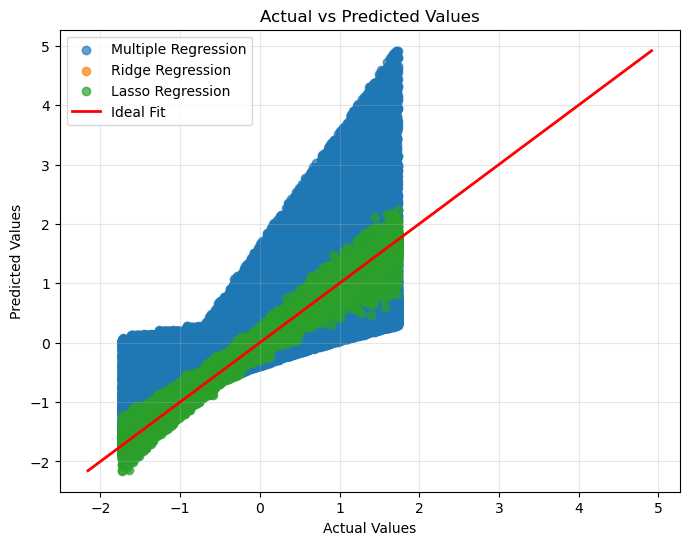

In [13]:
# Adjust the Ideal Fit Line to Extend Fully
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multiple, label='Multiple Regression', alpha=0.7)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.7)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.7)

# Extend the ideal fit line across the full range of the plot
min_val = min(y_test.min(), y_pred_multiple.min(), y_pred_ridge.min(), y_pred_lasso.min())
max_val = max(y_test.max(), y_pred_multiple.max(), y_pred_ridge.max(), y_pred_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Fit', linewidth=2)

# Add titles, labels, and legend
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The scatter plot compares actual vs. predicted housing values using Multiple Regression (blue), Ridge Regression (orange), and Lasso Regression (green), with the red line as the ideal fit. Most points cluster near the line, showing good predictions, but Multiple Regression has more spread, indicating potential overfitting. Ridge and Lasso Regression points are tighter around the line, suggesting better regularization and more reliable predictions for the housing dataset.

In [14]:
# Replace `model` with the variable name of your trained model
joblib.dump(multiple_model, "housing_model.pkl")

['housing_model.pkl']